### All Data: Consensus Genotype
Size_Sample_Insertions_AllData_2500

* Size Ranges
* Training Dataset size : 2500

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


***
Training Set

Count : 2500
*** 

In [2]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/INS/ins_samp_2500_train.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/train/INS/ins_samp_2500_train.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,GTconflict,GTcons,GTsupp,Ill250.GT,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,sample,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,type
0,-1,2,2,-1.0,973.083333,27.216595,12.0,365.916667,40.13614,12.0,...,1.0,0,0,HG002,0,0.0,81297748,1,1.0,Insertion


In [3]:
train_set = pd.DataFrame()
train_set = df_train_2

In [4]:
train_set['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
train_set['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
train_set['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)

** Count of Labels in Training Set **

<a id='imbalance'></a>

In [5]:
pd.value_counts(train_set['GTcons'].values, sort=False)

Homozygous_Variant       785
Heterozygous_Variant    1104
Homozygous_Reference     611
dtype: int64

***
Test Set

Count : 3268
***

<a id='hom_ref'></a>

In [6]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/test/5k.INS.test.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/5k_testSet/test/5k.INS.test.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.shape

(3268, 188)

In [7]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'New_ID'}

In [8]:
### Drop columns that are not shared by both dataframes
df_train.drop(['Ill300x.GT'], axis=1, inplace = True)
df_train.drop(['Ill250.GT'], axis=1, inplace = True)
df_train.drop(['IllMP.GT'], axis=1, inplace = True)
df_train.drop(['TenX.GT'], axis=1, inplace = True)
df_train.drop(['pacbio.GT'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [9]:
df_train.head(1)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2,973.083333,27.216595,12.0,365.916667,40.13614,12.0,0.0,879.482587,158.761503,...,15074.0,0.0,1.0,0,0,0,0.0,81297748,1,1.0


In [10]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [11]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict',
 'GTsupp',
 'Ill250.GT',
 'Ill300x.GT',
 'IllMP.GT',
 'New_ID',
 'SVtype',
 'TenX.GT',
 'id',
 'pacbio.GT',
 'sample',
 'type'}

In [12]:
### Drop columns that are not shared by both dataframes
df_test.drop(['Ill300x.GT'], axis=1, inplace = True)
df_test.drop(['Ill250.GT'], axis=1, inplace = True)
df_test.drop(['IllMP.GT'], axis=1, inplace = True)
df_test.drop(['TenX.GT'], axis=1, inplace = True)
df_test.drop(['pacbio.GT'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)
df_test.drop(['New_ID'], axis=1, inplace = True)

***
Import '-1' Labeled Data (Unknown Data) 
*** 

In [13]:
# Import Test Data
# SVanalyzer generated training data
df_min1 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/INS/ins_HG002_min1.csv')
df_min1_2 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/dataframes/Step1_CombinedDFs/min1_DFs/INS/ins_HG002_min1.csv')
df_min1.rename(columns={'size': 'Size'}, inplace=True)
df_min1.drop(['New_ID'], axis=1, inplace = True)
df_min1.drop(['index'], axis=1, inplace = True)
df_min1.shape

(2049, 189)

In [14]:
df_min1['chrom'].replace('X', 23, inplace=True)
df_min1['chrom'].replace('Y', 24, inplace=True)

In [15]:
### Drop columns that are not shared by both dataframes
df_min1.drop(['Ill300x.GT'], axis=1, inplace = True)
df_min1.drop(['Ill250.GT'], axis=1, inplace = True)
df_min1.drop(['IllMP.GT'], axis=1, inplace = True)
df_min1.drop(['TenX.GT'], axis=1, inplace = True)
df_min1.drop(['pacbio.GT'], axis=1, inplace = True)
df_min1.drop(['GTconflict'], axis=1, inplace = True)
df_min1.drop(['GTsupp'], axis=1, inplace = True)
df_min1.drop(['sample'], axis=1, inplace = True)
df_min1.drop(['SVtype'], axis=1, inplace = True)
df_min1.drop(['type'], axis=1, inplace = True)
df_min1.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [16]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2,973.083333,27.216595,12.0,365.916667,40.136140,12.0,0.0,879.482587,158.761503,...,15074.00000,0.000000,1.0,0,0,0,0.0,81297748,1,1.0
1,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,883.744048,154.625892,...,11003.84615,4340.266792,13.0,0,0,0,0.0,18967658,0,0.0
2,2,962.971429,31.533643,35.0,446.028571,87.084355,35.0,0.0,842.507692,158.966578,...,0.00000,0.000000,0.0,0,0,0,0.0,131680600,1,1.0


In [17]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/2500 with 1 missing, elapsed time: 5.018
Imputing row 101/2500 with 1 missing, elapsed time: 5.043
Imputing row 201/2500 with 0 missing, elapsed time: 5.059
Imputing row 301/2500 with 2 missing, elapsed time: 5.076
Imputing row 401/2500 with 4 missing, elapsed time: 5.091
Imputing row 501/2500 with 6 missing, elapsed time: 5.104
Imputing row 601/2500 with 1 missing, elapsed time: 5.122
Imputing row 701/2500 with 2 missing, elapsed time: 5.139
Imputing row 801/2500 with 1 missing, elapsed time: 5.153
Imputing row 901/2500 with 59 missing, elapsed time: 5.167
Imputing row 1001/2500 with 1 missing, elapsed time: 5.181
Imputing row 1101/2500 with 4 missing, elapsed time: 5.205
Imputing row 1201/2500 with 0 missing, elapsed time: 5.218
Imputing row 1301/2500 with 60 missing, elapsed time: 5.233
Imputing row 1401/2500 with 4 missing, elapsed time: 5.251
Imputing row 1501/2500 with 0 missing, elapsed time: 5.265
Imputing row 1601/2500 with 1 missing, elapsed time: 5.280
Imputin

In [18]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,2.0,973.083333,27.216595,12.0,365.916667,40.136140,12.0,0.0,879.482587,158.761503,...,15074.00000,0.000000,1.0,0.0,0.0,0.0,0.0,81297748.0,1.0,1.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,883.744048,154.625892,...,11003.84615,4340.266792,13.0,0.0,0.0,0.0,0.0,18967658.0,0.0,0.0
2,2.0,962.971429,31.533643,35.0,446.028571,87.084355,35.0,0.0,842.507692,158.966578,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,131680600.0,1.0,1.0


In [19]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [20]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

2.0     785
0.0     611
1.0    1104
dtype: int64

In [21]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [22]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [23]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [24]:
# Train Random Forest Classifier
model = RandomForestClassifier(oob_score=True) 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [25]:
print('The OOB prediction of accuracy is: {oob}%'.format(oob=model.oob_score_ * 100))

The OOB prediction of accuracy is: 97.08571428571429%


In [26]:
sns.set_style("white")

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

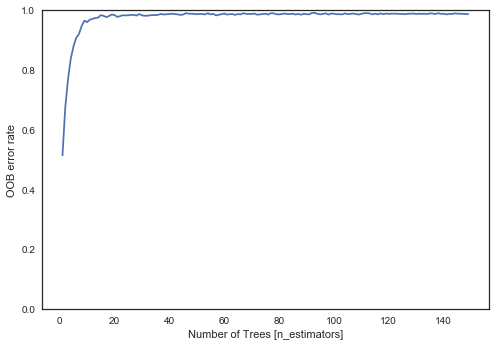

In [28]:
n_estimators = 150
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 
    
    
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob


plt.plot(trees, oob)

plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/ins_alldata_2500_trees_oob_150trees.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [29]:
model = RandomForestClassifier(n_estimators=60, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

In [30]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



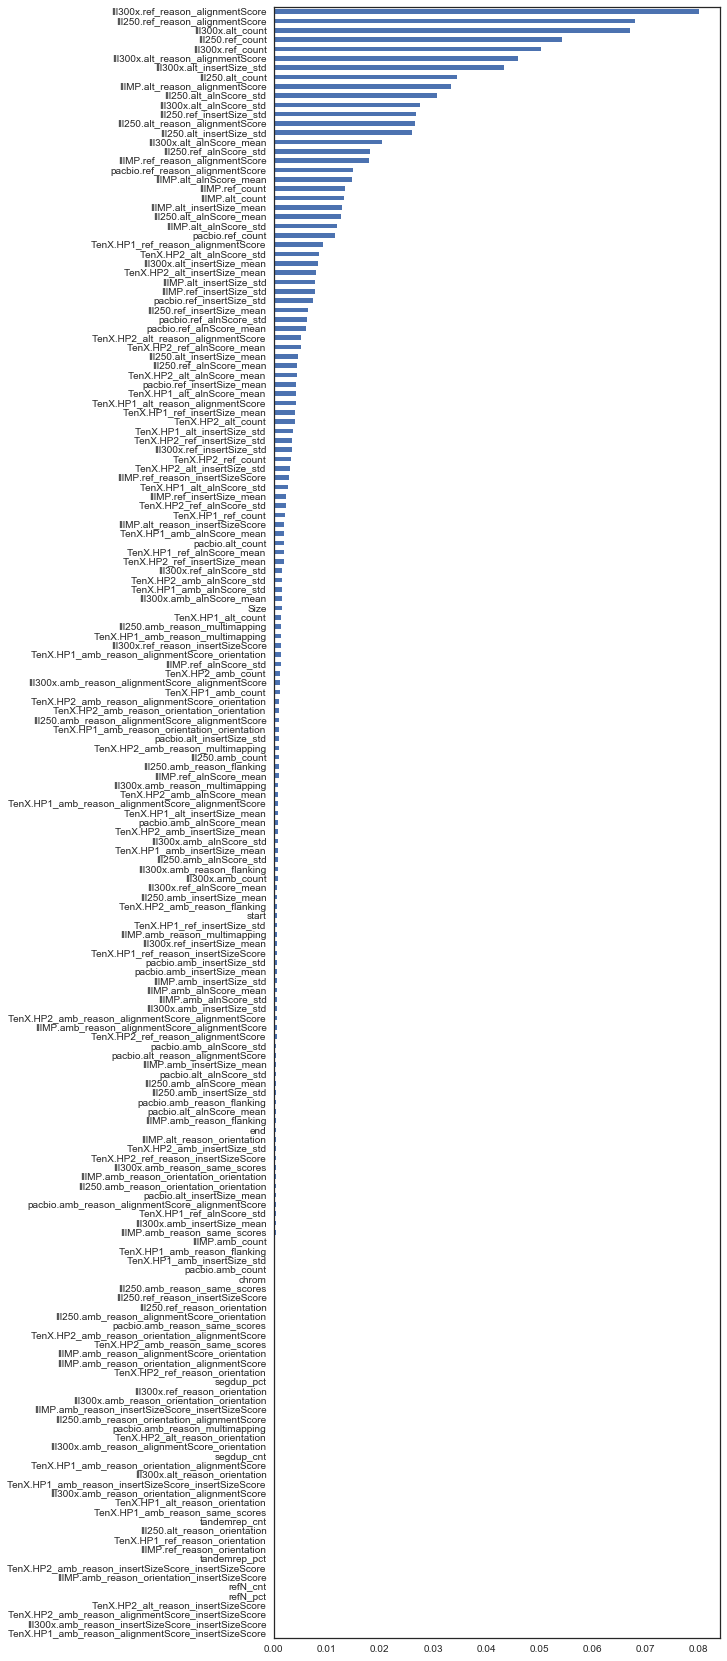

In [31]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/ins_alldata_2500_featImp_60.png', bbox_inches='tight')
plt.show()


In [32]:
feature_importances.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/ins_alldata_2500_featImp.csv')

In [33]:
X_ = X4[['Ill300x.ref_reason_alignmentScore','Ill250.ref_reason_alignmentScore','Ill300x.alt_count','Ill250.ref_count','Ill300x.ref_count','Ill300x.alt_reason_alignmentScore','Ill300x.alt_insertSize_std','Ill250.alt_count','IllMP.alt_reason_alignmentScore','Ill250.alt_alnScore_std','Ill300x.alt_alnScore_std','Ill250.ref_insertSize_std','Ill250.alt_reason_alignmentScore','Ill250.alt_insertSize_std','Ill300x.alt_alnScore_mean','Ill250.ref_alnScore_std','IllMP.ref_reason_alignmentScore','pacbio.ref_reason_alignmentScore','IllMP.alt_alnScore_mean','IllMP.ref_count','IllMP.alt_count','IllMP.alt_insertSize_mean','Ill250.alt_alnScore_mean','IllMP.alt_alnScore_std','pacbio.ref_count']]

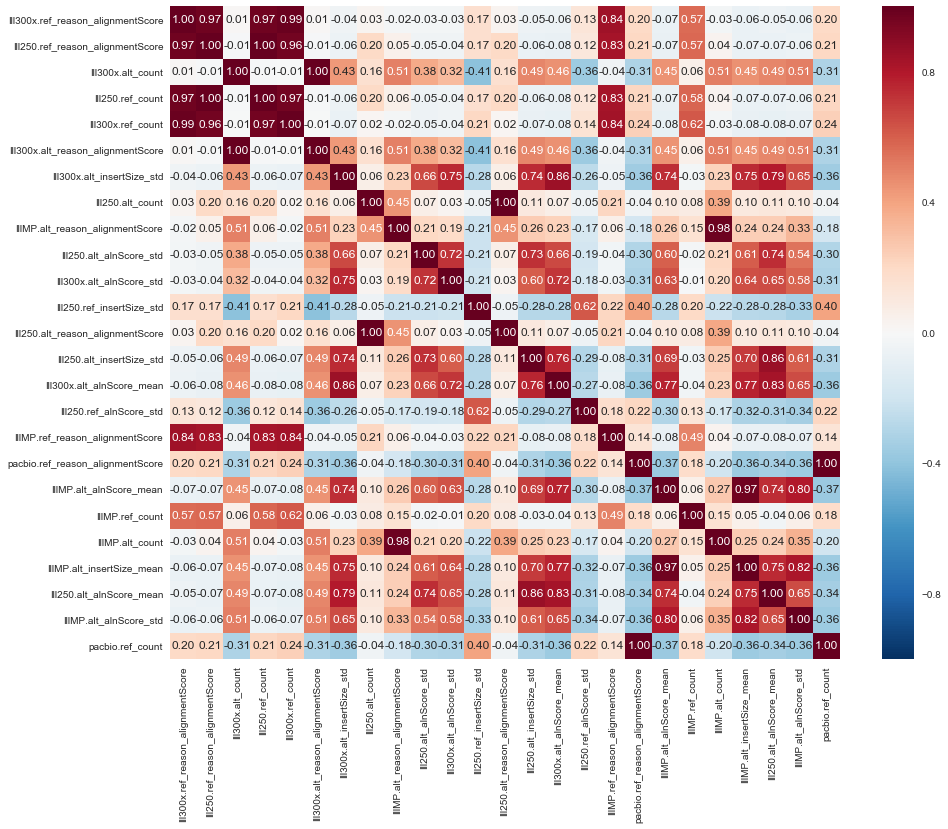

In [34]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.savefig('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/ins_alldata_2500_heatmap_60.png', bbox_inches='tight')
plt.show()

In [35]:
pred = model.predict(X_test)

In [36]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Precision score of the training subset: 0.997
Accuracy score of the training subset: 0.997


In [37]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
labels = pd.DataFrame(y_test)

In [38]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_train['GTcons']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']

In [39]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [40]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Variant      222
Heterozygous_Variant    325
Homozygous_Reference    203
dtype: int64

In [41]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Variant      221
Heterozygous_Variant    327
Homozygous_Reference    202
dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[325   0   0]
 [  1 202   0]
 [  1   0 221]]


In [43]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,325,0,0,325
Homozygous_Reference,1,202,0,203
Homozygous_Variant,1,0,221,222
All,327,202,221,750


In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.99      1.00      1.00       325
Homozygous_Reference       1.00      1.00      1.00       203
  Homozygous_Variant       1.00      1.00      1.00       222

         avg / total       1.00      1.00      1.00       750



***
Predict

Predict labels for test set
***

** Load Data **

In [45]:
df_test.drop(['GTcons'],axis=1, inplace=True)
X2 = df_test

** Impute missing values using KNN **

In [46]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/3268 with 3 missing, elapsed time: 9.610
Imputing row 101/3268 with 2 missing, elapsed time: 9.625
Imputing row 201/3268 with 2 missing, elapsed time: 9.640
Imputing row 301/3268 with 2 missing, elapsed time: 9.654
Imputing row 401/3268 with 2 missing, elapsed time: 9.670
Imputing row 501/3268 with 3 missing, elapsed time: 9.689
Imputing row 601/3268 with 3 missing, elapsed time: 9.707
Imputing row 701/3268 with 3 missing, elapsed time: 9.721
Imputing row 801/3268 with 2 missing, elapsed time: 9.736
Imputing row 901/3268 with 2 missing, elapsed time: 9.749
Imputing row 1001/3268 with 2 missing, elapsed time: 9.769
Imputing row 1101/3268 with 1 missing, elapsed time: 9.787
Imputing row 1201/3268 with 2 missing, elapsed time: 9.812
Imputing row 1301/3268 with 3 missing, elapsed time: 9.835
Imputing row 1401/3268 with 3 missing, elapsed time: 9.852
Imputing row 1501/3268 with 1 missing, elapsed time: 9.868
Imputing row 1601/3268 with 2 missing, elapsed time: 9.885
Imputing 

In [47]:
df_test_header = list(df_test.columns.values)
X2.columns = df_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,973.000000,0.000000,1.0,818.000000,0.000000,1.0,0.0,885.850829,154.918495,181.0,...,11057.206900,4700.613341,58.0,0.0,0.0,0.0,0.0,105840190.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,877.896552,119.594577,174.0,...,9840.192308,2989.295737,26.0,0.0,0.0,0.0,0.0,9378820.0,1.0,1.0
2,977.166667,12.113583,30.0,413.333333,96.220349,30.0,0.0,869.180412,176.186533,194.0,...,9799.761905,3314.337970,21.0,0.0,0.0,0.0,0.0,154866979.0,0.0,0.0


In [48]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,Ill250.amb_count,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,973.000000,0.000000,1.0,818.000000,0.000000,1.0,0.0,885.850829,154.918495,181.0,...,11057.206900,4700.613341,58.0,0.0,0.0,0.0,0.0,105840190.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,877.896552,119.594577,174.0,...,9840.192308,2989.295737,26.0,0.0,0.0,0.0,0.0,9378820.0,1.0,1.0
2,977.166667,12.113583,30.0,413.333333,96.220349,30.0,0.0,869.180412,176.186533,194.0,...,9799.761905,3314.337970,21.0,0.0,0.0,0.0,0.0,154866979.0,0.0,0.0


In [49]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [50]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [51]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['GTcons'] = df_test_2['GTcons']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTsupp'] = df_test_2['GTsupp']

In [52]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/df_alldata_2500_df1_60.csv', index=False)

In [53]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/df_alldata_2500_df1_60.csv')

In [54]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [55]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/df_alldata_2500_df2_60.csv', index=False)

In [56]:
X6['GTcons'].dtypes

dtype('int64')

In [57]:
# Drop NaN Labels
X6 = X6[np.isfinite(X6['GTcons'])]
X6 = X6[np.isfinite(X6['predicted_GTcons_label'])]

***
Label Analysis
***

In [58]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 853   12    0]
 [   6 1542    6]
 [   2    2  845]]


In [59]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [60]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Precision score of the prediction subset: 0.991
Accuracy score of the prediction subset: 0.991


In [61]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1542,6,6,1554
Homozygous_Reference,12,853,0,865
Homozygous_Variant,2,2,845,849
All,1556,861,851,3268


In [62]:
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/2500_confMatrix_60.csv')

** Labels with Pred_Prob >=0.9 **

In [63]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]

In [64]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1381,0,0,1381
Homozygous_Reference,3,750,0,753
Homozygous_Variant,0,0,732,732
All,1384,750,732,2866


In [65]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
conf_mat = pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)
conf_mat.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/2500_confMatrix_hi_60.csv')

In [66]:
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00      1381
Homozygous_Reference       1.00      1.00      1.00       753
  Homozygous_Variant       1.00      1.00      1.00       732

         avg / total       1.00      1.00      1.00      2866



***
Predict

Predict labels for minus 1 (unknown label) set
***

** Load Data **

In [ ]:
df_min1.drop(['GTcons'],axis=1, inplace=True)
X2 = df_min1

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_min1_header = list(df_min1.columns.values)
X2.columns = df_min1_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

In [ ]:
pred = model.predict(X5)
pred_prob = model.predict_proba(X5)
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_min1_2['chrom']
X5['GTcons'] = df_min1_2['GTcons']
X5['start'] = df_min1_2['start']
X5['end'] = df_min1_2['end']
X5['Size'] = df_min1_2['Size']
X5['GTsupp'] = df_min1_2['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/df_alldata_2500_min1_df1_100.csv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/df_alldata_2500_min1_df1_100.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6.to_csv('/Volumes/lesleydata/size_sample/Step4_ML/plots/INS/all_data/5k_Test_Set/2500_train/dataframes/df_alldata_2500_min1_df2_100.csv')